### FrozenLake-v1
"The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile."
https://gym.openai.com/envs/FrozenLake-v0/ 

The below is Frozen Lake set to slippery and random. The agent will not do well if it can only see its immediate surroundings in a random map but if it can see the whole map, it can do well with training and avoid holes ie it can avoid holes if it can see them before moving to hole.

#### SUMMARY
Environment: The whole grid world including all squares e.g. 4x4 = 16 squares
State: One square
Agent: Can occupy one state at a time, can perform actions (up, down, left, right). As the agent travels and explores the environment it will work out th ebest policy.
Reward: +1 when finding the fisbee goal, -1 when falling in a hole.Can implement a negative reward eg -0.1 per step i.e. higher reward if reached faster.
Policy: Map & information about what action to take in a particular state. The best policy is to thake the best action in a particular state. Find a policy that allows agent to gain maxium reward.

###### Q-TABLE (reward table)
As the agent expolores, it records the best action to take for each state (square) in the Q-Table 
e.g. If you start in state C1 and the reward is at A1, it is best to move up when in square C1. From B1 it is then best to move up and get the reward at A1.

###### Goal: The way to choose the best action fr every state in the environment.
- Gym presets the reward ie cannot change reward to solve these problems. 
- You can change how the q-table is populated. You can change how the Q-table is calculated on each step. e.g. Keep track of the reward for each step and long term.


In [96]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

In [97]:
env = gym.make('FrozenLake-v1', is_slippery=True )
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print("The dimensions of the q table are: ", q_table.shape)
print(q_table)


The dimensions of the q table are:  (16, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [98]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.9 #0.03 #Between 0 and 1. How quickly the agent abandons the previous value in the Q table for the new value. 0: Agent learns nothing and only uses prior knowledge. 1: Agent considers only the most recent information.
discount_rate = 0.9 #0.97 Determines the importance of future rewards. 0 agent is short sighted and seees only current reqards. Appoaching 1, the agent strives for long term rewards.

exploration_rate = 1
max_exploration_rate = 1    #1: Guaranteed that agent starts the game by 100% exploring the environment
min_exploration_rate = 0    #0: Agent does not explore at all. Agent only exploits (chooses actions to get max points)
exploration_decay_rate = 0.001

#Change state to represent the whole grid rather than one tile

*** AVG reward per 1000 episodes***

1000 :  0.17100000000000012
2000 :  0.17100000000000012
3000 :  0.17300000000000013
4000 :  0.22900000000000018
5000 :  0.21900000000000017
6000 :  0.22200000000000017
7000 :  0.23000000000000018
8000 :  0.2620000000000002
9000 :  0.20600000000000016
10000 :  0.21600000000000016
11000 :  0.2640000000000002
12000 :  0.2410000000000002
13000 :  0.21200000000000016
14000 :  0.21500000000000016
15000 :  0.21400000000000016
16000 :  0.21900000000000017
17000 :  0.21700000000000016
18000 :  0.20800000000000016
19000 :  0.20700000000000016
20000 :  0.22800000000000017


 *** Q-table ***

[[0.0332137  0.22858155 0.03391567 0.0347093 ]
 [0.03257074 0.25013484 0.0333492  0.03343517]
 [0.04763185 0.31873318 0.04678817 0.04019886]
 [0.35286779 0.04535536 0.04649199 0.04699407]
 [0.03900777 0.03636411 0.50536976 0.03310691]
 [0.04061397 0.10200513 0.03899264 0.04112443]
 [0.05295157 0.05669178 0.41803098 0.05699151]
 [0.06226115 0.84325777 0.06118828 0.05780905]

(0.0, 1.0)

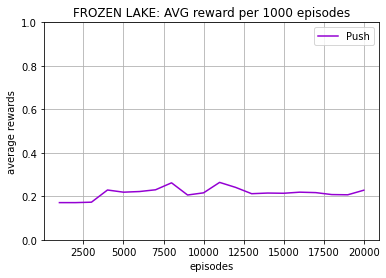

In [99]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    
    random_map = generate_random_map(size=4, p=0.8) # p is the probability of where the holes are
    env = gym.make('FrozenLake-v1', is_slippery=True, desc=random_map)
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range (max_steps_per_episode):

        # Exploration / Exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

# Calculate reward across all episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
count_plot = [] #for plotting
r_plot = [] #for plotting
print("*** AVG reward per 1000 episodes***\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count_plot.append(count) #for plotting. 
    r_plot.append(sum(r/1000)) #for plotting
    count += 1000


# Print Q table
print("\n\n *** Q-table ***\n")
print(q_table)


#Plot results 
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("FROZEN LAKE: AVG reward per 1000 episodes")
# Plotting all the graphs
plt.plot(count_plot, r_plot, color="darkviolet", label = "Push")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 1])

In [100]:

for episode in range(10):
    #random map each episode
    random_map = generate_random_map(size=4, p=0.8)
    env = gym.make('FrozenLake-v1', is_slippery=True, desc=random_map) #generates random map for each episode
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1) #changed from 1

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3) #changed from 0.3
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(1) #changed from 3
            else:
                print("****You fell through a hole!****")
                time.sleep(1) #changed from 3
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

  (Down)
SFFH
FFHF
FFFF
FFFG
****You fell through a hole!****


### Conclusion

It is not "possible to learn an optimal policy for the average environment" - https://stats.stackexchange.com/questions/453150/can-an-agent-be-trained-in-a-completely-random-environment-the-rules-and-action

"The distribution of purely random numbers is uniform so there's nothing to learn....Reinforcement learning assumes your environment is stationary. The underlying probability distribution of your environment (both transition and reward function) must be held constant throughout the learning process. Sure, RL and DRL can deal with some slightly non-stationary problems, but it struggles at that. Markov Decision Processes (MDPs) and Partially-Observable MDPs assume stationarity. So value-based algorithms, which are specialized in exploiting MDP-like environments, such as SARSA, Q-learning, DQN, DDQN, Dueling DQN, etc., will have a hard time learning anything in non-stationary environments. The more you go towards policy-based algorithms, such as PPO, TRPO, or even better gradient-free, such as GA, CEM, etc., the better chance you have as these algorithms don't try to exploit this assumption. Also, playing with the learning rate would be essential to make sure the agent never stops learning.." - https://stackoverflow.com/questions/52744919/is-reinforcement-learning-applicable-to-a-random-environment
